# Visualizing Raw EEG Data using MNE

## Install MNE Library

In [1]:
# install MNE module
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.4 MB/s eta 0:00:00


## Upload EEG Data Files

In [2]:
# import EEG data files
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vhdr
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.eeg
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vmrk

--2026-01-01 11:11:00--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vhdr
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3876 (3.8K) [application/octet-stream]
Saving to: ‘N400_dataset_04.vhdr’

N400_dataset_04.vhd 100%[===================>]   3.79K  --.-KB/s    in 0s      

2026-01-01 11:11:00 (60.6 MB/s) - ‘N400_dataset_04.vhdr’ saved [3876/3876]

--2026-01-01 11:11:00--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.eeg
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43685760 (42M) [application/octet-stream]
Saving to: ‘N400_dataset_04.eeg’

N400_dataset_04.eeg 100%[=====

## Import Libraries

In [4]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

## Import Raw Data

We use the **`read_raw_brainvision()`** method to import the raw data.

In [5]:
# import raw data
raw = mne.io.read_raw_brainvision('N400_dataset_04.vhdr', preload='True')

## Descriptive Statistics on Channels

We saw preivously how to get metadata from the **`raw`** object using the **`info`** property.

Another useful way of peeking into a **`raw`** object data is to use the **`describe()`** method to see the names of each channel, and the range of values in each channel.

In [6]:
raw.describe()

<RawBrainVision | N400_dataset_04.eeg, 16 x 682590 (1365.2 s), ~83.3 MiB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV    -460888.53     -14.77      -3.38       8.68   65362.81
 1  F3    EEG   µV    -417836.60      -7.62       0.04       8.09  433962.81
 2  F7    EEG   µV    -539097.58     -11.49       0.13      12.19   56759.66
 3  C3    EEG   µV    -417935.09      -8.64       0.55       9.65  428336.74
 4  P3    EEG   µV    -421797.98     -12.57      -0.88      11.34  443757.24
 5  TP9   EEG   µV    -583120.89     -12.34       0.34      13.06   63447.49
 6  Fz    EEG   µV    -19902561.68     -10.36      -0.37       8.84  2325863.26
 7  Cz    EEG   µV    -554293.03      -7.00      -0.23       7.09   54260.04
 8  Fp2   EEG   µV    -19886191.38     -18.89       0.56      22.20  2330157.21
 9  F4    EEG   µV    -1375106.03      -9.65      -1.10       8.03  9464989.69
10  F8    EEG   µV    -9987167.54     -16.16      -1.91    

## Set Montage

The **`raw`** object contains the 10-20 system labels for each channel, but it doesn’t provide information about the location of each electrode on the scalp

Internally, MNE can represent the location of each channel in a 3D Cartesian coordinate system.

This is necessary to plot the locations of the channels on the scalp, which is extremely useful when visualizing EEG data.

The set of coordinates for each channel is called the **`montage`** of the **`raw`** object.

We can set the **`montage`** of the **`raw`** object to the 10-20 system using the **`set_montage()`** method.

This will add the location information to the **`raw`** object.

MNE provies a large set of standard montages for many commercial EEG systems

MNE automatically uses only the channels present in your specific dataset.

For the present data, the EEG caps were manufactured by a company named Easycap, and so we load the montage for the Easycap system.

In [23]:
# apply the esaycape montage to your raw data
raw.set_montage('easycap-M1', on_missing='ignore')

<RawBrainVision | N400_dataset_04.eeg, 16 x 682590 (1365.2 s), ~83.3 MiB, data loaded>

## Visualization

### View the Sensor Positions

We use the **`plot_sensors()`** methode to view the sensor positions:

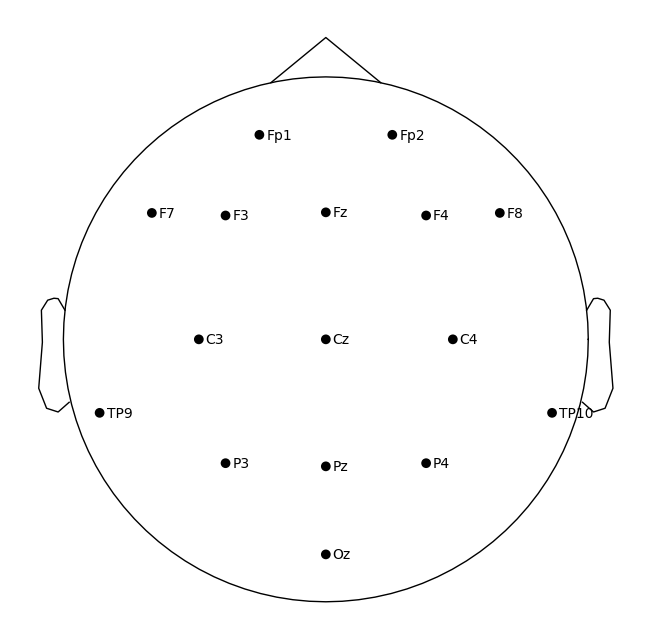

In [22]:
# Plot sensor locations on a scalp map
raw.plot_sensors(show_names=True);

### View the Raw Data

We use the **`plot()`** methode to view the raw data.

**Parameters:**
* **duration:** `float`
  * Time window to plot.
* **start:** `float`
  * Initial time to show.
* **n_channels:** `int`
  * Number of channels to plot at once. Defaults to 20.

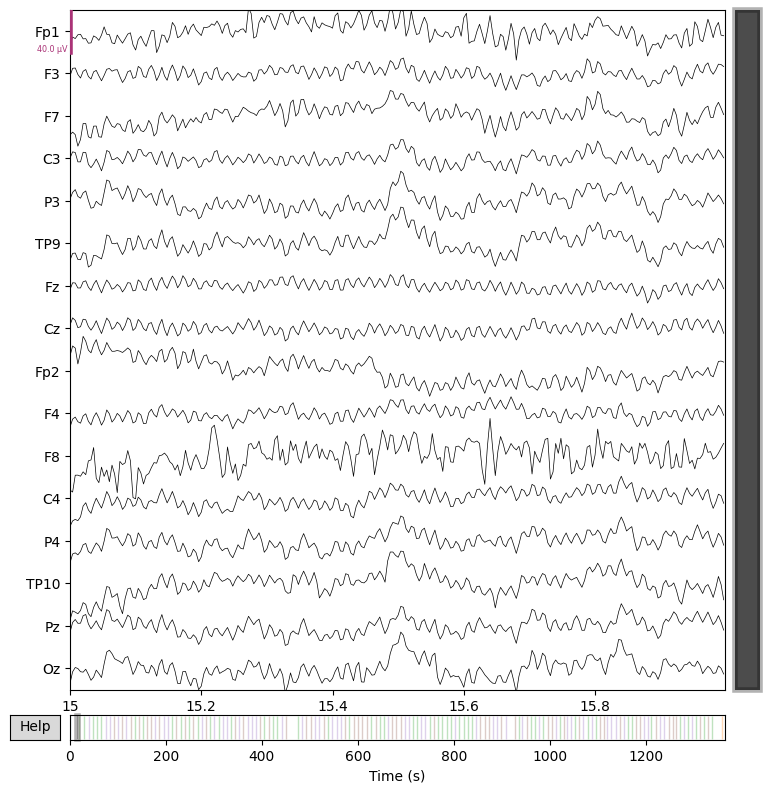

In [24]:
# define the time slice
start_time = 15.0  # start time in seconds
duration = 1.0   # duration to plot in seconds (ends at 16.0s)

# plot the data
raw.plot(start=start_time, duration=duration, n_channels=16);

The area at the bottom of the plot shows the entire raw EEG recording.

The green vertical bar near the start indicates the position in the file that is currently plotted.

The other colored vertical lines mark the times of event codes sent by the stimulus presentation program, which mark events of experimental interest.

#### Select Channels

We select the channels to include in the plot by setting the **`picks`** parameter of the **`plot()`** method:
* **picks:** `str` | `array_like` | `slice` | `None`
  * Channels to include. Slices and lists of integers will be interpreted as channel indices.

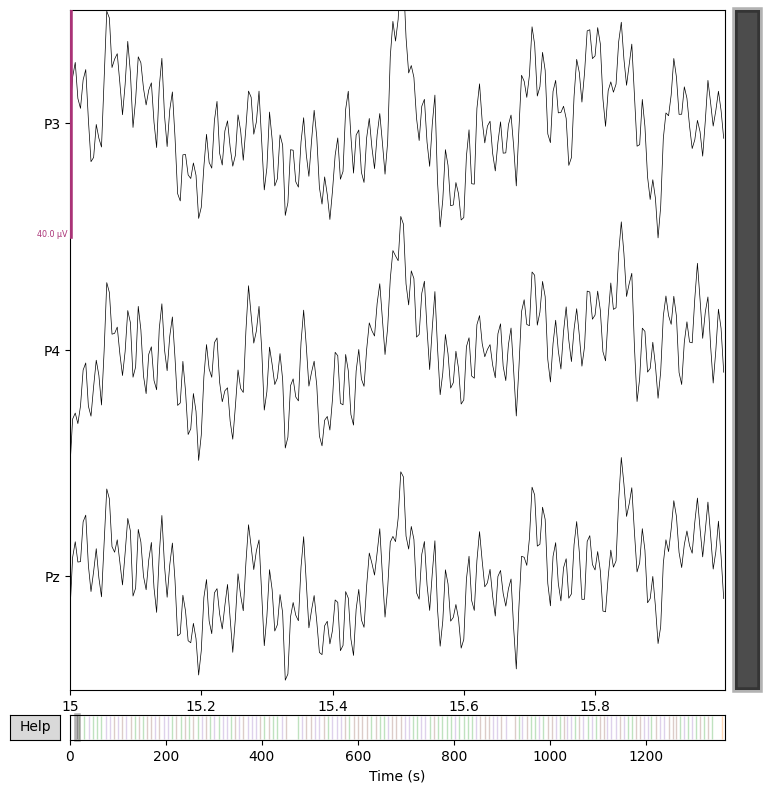

In [18]:
# select channels Pz, P3, P4
# using channel names (list of strings)
channel_list = ['Pz', 'P3', 'P4']

# plot the data
raw.plot(start=start_time, duration=duration, picks=channel_list);

**Select channels using a slice:**

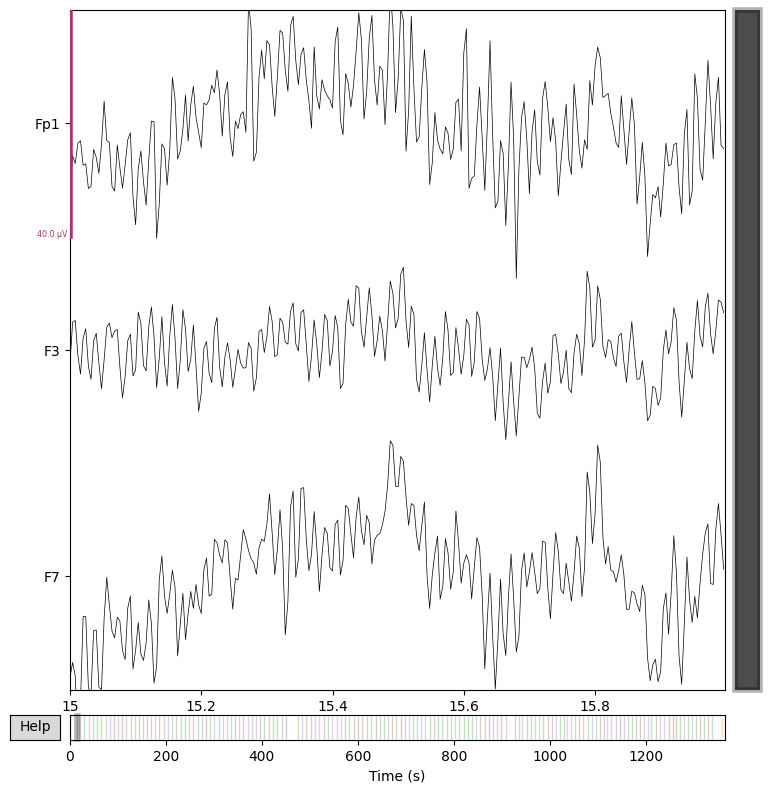

In [25]:
# select channels using a slice: indices from 0 to 2
channel_list = range(0,3)

# plot the data
raw.plot(start=start_time, duration=duration, picks=channel_list);

## Create a Subset of the Raw Data

We use the **`pick()`** method to select a specific subset of channels by their exact names.

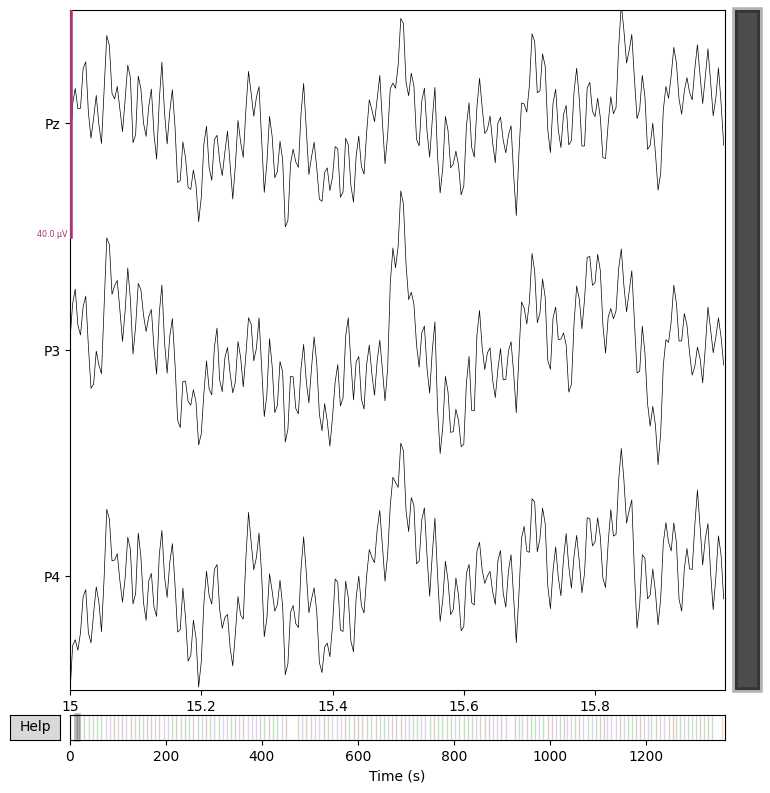

In [26]:
# set selected channels by name
selected_channel_names = ['Pz', 'P3', 'P4']

# create a subset of the raw data using .pick() method
raw_subset_data = raw.copy().pick(picks=selected_channel_names)

# plot the data
raw_subset_data.plot(start=start_time, duration=duration);

## Event codes (Markers / Triggers)

Event codes, often called markers or triggers, are codes that are sent by the stimulus presentation program to mark the times of events of experimental interest.

The event codes are stored in the `.vmrk` file in Brain Vision format.

When we import the raw data into MNE, these are stored in an attribute called **`_annotations`**.

Although we can access that directly (e.g., `raw._annotations`), MNE provides the **`events_from_annotations()`** function that makes this easier and generate more interpretable output.

In [17]:
mne.events_from_annotations(raw)

(array([[    20,      0,  10001],
        [  9438,      0,      5],
        [  9443,      0,      1],
        [ 14663,      0,      1],
        [ 19347,      0,      2],
        [ 23789,      0,      1],
        [ 28364,      0,      1],
        [ 32756,      0,      1],
        [ 37015,      0,      2],
        [ 41332,      0,      2],
        [ 45549,      0,      3],
        [ 50040,      0,      2],
        [ 54316,      0,      3],
        [ 58816,      0,      2],
        [ 63091,      0,      3],
        [ 67308,      0,      1],
        [ 71733,      0,      3],
        [ 76067,      0,      1],
        [ 80384,      0,      3],
        [ 84659,      0,      3],
        [ 88951,      0,      2],
        [ 93226,      0,      3],
        [ 97485,      0,      2],
        [101819,      0,      2],
        [106694,      0,      1],
        [110961,      0,      3],
        [115453,      0,      1],
        [119678,      0,      3],
        [123928,      0,      1],
        [12840

The result includes two outputs.

The first is a NumPy array that has three columns, with one row for each event code in the data.<br>
The first column indicates the time of the event, and the last column stores the code associated with that event.<br>
These event codes are always represented as integers (since it is a NumPy array of integers).

The second output is a dictionary mapping labels for each event code to the numerical codes.

One important thing to know is that the event codes are stored in the same units as the data, so in this case, the event codes are in units of samples, not milliseconds. MNE knows this and operates accordingly.<br>
Since the raw data is sampled at 500 Hz, this means that each measurement is 1/500th of a second, or 2 ms.

## Summary

MNE Provides a number of methods for the **`Raw`** object that allow us to access and visualize aspects of both the metadata — including channel locations — and the data itself.

In practice these are useful things to be familiar with, and they can be used when you’re working with data from a system or format that you’re not familiar with to get a better idea of the structure of the data.

In routine usage, within the context of a specific experiment we can expect that all of the data have the same structure.